In [1]:
# Implimenting perceptron trick

from sklearn.datasets import make_classification 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 


In [2]:
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,
            
                            hypercube=False,class_sep=10)

In [3]:
np.insert(x,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [5]:
print(x)
print()
print(y)

[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.8394709 ]
 [-0.98821248  0.90327412]
 

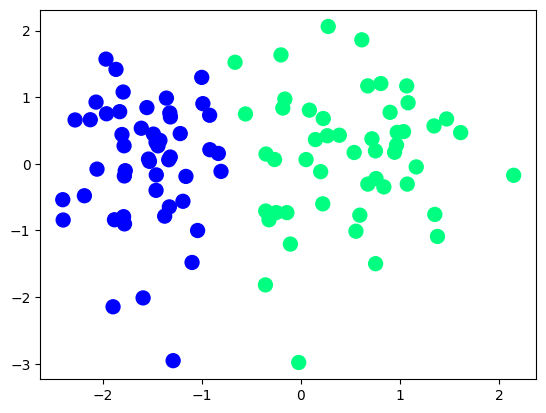

In [24]:
# See the distribution of x 
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [11]:
def perceptron(x,y):

    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

In [12]:
def step(z):
    return 1 if z>0 else 0

In [15]:
intercept_,coef_ = perceptron(x,y)

In [16]:
print(coef_)
print(intercept_)

[1.34487689 0.04483867]
1.0


In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
print(m,b)

-29.99368357561289 -22.30217782166937


In [19]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b 


(-3.0, 2.0)

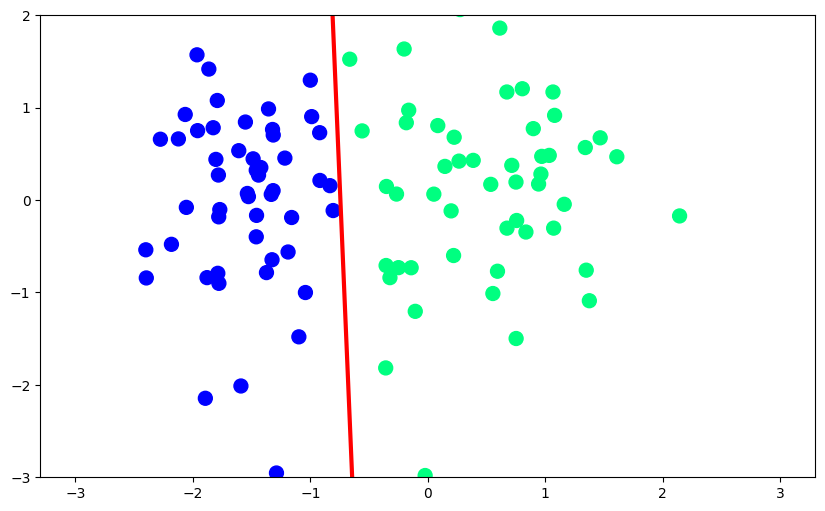

In [21]:
# lets plot the corrected line with m and c 

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [23]:
# Now let's check the actual logisticRgressoin class implimentation provided by sklearn 

from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [30]:
# extract m and c 
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])


[[3.50204668 0.02749943]]
[2.25256402]
-127.34979670277542
[-81.91311981]


In [25]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

C:\Users\yogesh\AppData\Local\Temp\ipykernel_45676\1210643755.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],cmap='winter',s=100)


(-3.0, 2.0)

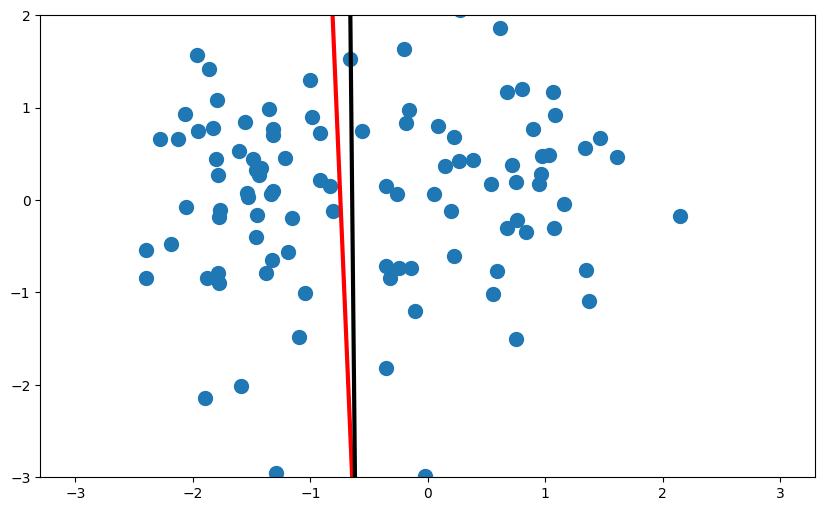

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],cmap='winter',s=100)
plt.ylim(-3,2)

In [31]:
# Now lets use sigmoid function in perceptron 

def perceptron(x,y):

    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]


In [32]:
def sigmoid(z):
    return 1/(1-np.exp(-z))

In [33]:
intercept_,coef_ = perceptron(x,y)

In [35]:
m= -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [38]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b 

(-3.0, 2.0)

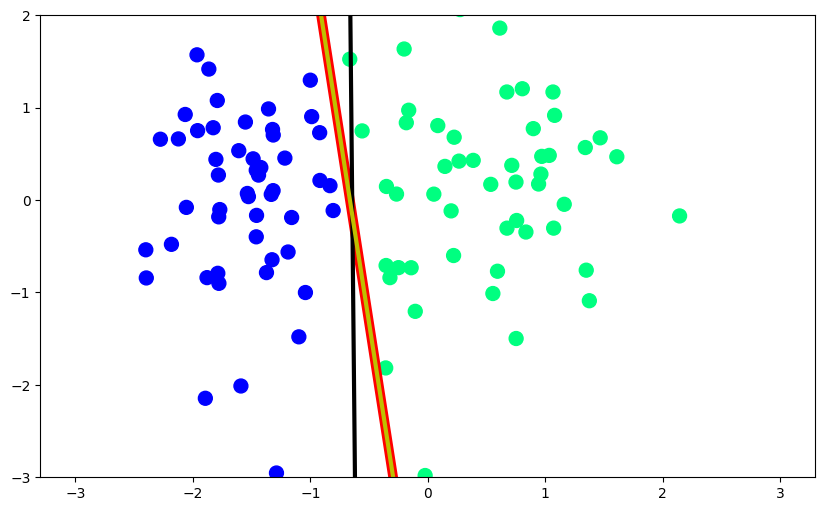

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color = 'r',linewidth=7)
plt.plot(x_input1,y_input1,color = 'black',linewidth=3)
plt.plot(x_input2,y_input2,color='y',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#So we are getting the same line and not able to get the exact line as logistic regression.